# Сбор и анализ данных с сайта lenobl.ru

### Библиотеки 

In [145]:
import pandas as pd
import requests
from bs4 import BeautifulSoup as bs
from pprint import pprint
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc = {'figure.figsize': (12,8)})
%matplotlib inline
import re
from datetime import date

### Парсер для нашего сайта

In [117]:
main_link = 'https://lenobl.ru'

# Для првоерки сайта бы бот или не бот
headers = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) \
                            AppleWebKit/537.36 (KHTML, like Gecko)\
                            Chrome/83.0.4103.116 Safari/537.36'}

# Количество страниц для парсинга на момент 13.08.2020 в 18 часов 
all_page = np.arange(1,713)

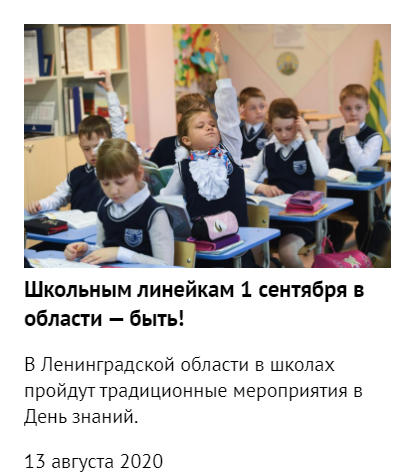

In [118]:
# Так как месяц указан прописью, то сразу сделаем словарь для замены на число
month = {
        'января':1,
        'февраля':2,
        "марта":3,
        "апреля":4,
        "мая":5,
        "июня":6,
        "июля":7,
        "августа":8,
        "сентября":9,
        "октября":10,
        "ноября":11,
        "декабря":12
        }

In [119]:
# Пустой список для хранения наших данных 
all_news = []

In [120]:
# Переменная all_page хранит все страницы по которым мы будем переходить.
# проход по странице делаем в два цикла:
# в первом цикле мы берем общую страницу выделяем элемент где хранятся все наши новосте
# во втором цикле мы берем каждый элемент новостей и вытаксиваем нужную нам информацию

for page in all_page:
    
    params = {'page':page}
    # Страница входа на сайт
    html = requests.get(main_link + '/ru/dlya-smi/news/', headers = headers, params = params)
    
    soup = bs(html.text, 'html.parser')
    
    # Блок-контент где хранятся все новости
    block_news = soup.find('div',{'class':'col-md-8'})
    
    # выделяем кадый блок отдельно в массив при помощи команты find_all
    list_news = block_news.find_all('div',{'class':'col-md-6'})
    
    # перебираем каждый блок для поиска нужно иформации
    for value in list_news:
        
        news_dict = dict()
        
        
        name_news = value.find('h3',{'data-widget':'ellipsis'}).getText()
        
        likn_news =main_link + value.find('a',{'class':'item'})['href']
        
        id_news = value.find('a',{'class':'item'})['href'].split('/')[-2]
        
        # Преобразуем дату с 1 января 2020  в 1-1-2020
        # Берем дату и преобразуем ее в массив из (1 января 2020)  получаем [1,января,2020] , 
        # так мы сожем обращаться по инедксу к месяцу и зменить слово на число 
        date_news = value.find('div',{'class':'meta'}).getText().split()
        
        # По клучю словаря вытаскиваем значение и заменяем по индексу. 
        # По первому индексу у нас нахвание месяца. из этого [1,января,2020] получаем [1,1,2020]
        date_news[1] = month[date_news[1]]
        
        # Переводим наш массив в строку путем склеивания. из этого [1,1,2020] получаем 1-1-2020
        date_news = '-'.join(str(x) for x in date_news)
        
        

        news_dict['name_news'] = name_news
        news_dict['likn_news'] = likn_news
        news_dict['date_news'] = date_news
        news_dict['id_news'] = id_news

        # Сохраняем наши данные каджой новости в список 
        all_news.append(news_dict)

### Обзор полученных данных 

In [121]:
df = pd.DataFrame(all_news)

In [138]:
df.head(20)

,name_news,likn_news,date_news,id_news
0,Школьным линейкам 1 сентября в области — быть!,https://lenobl.ru/ru/dlya-smi/news/29235/,13-08-2020,29235
1,В «красной» зоне больше не осталось районов,https://lenobl.ru/ru/dlya-smi/news/29234/,13-08-2020,29234
2,Развитие в киришском стиле,https://lenobl.ru/ru/dlya-smi/news/29231/,13-08-2020,29231
3,Область модернизирует молочное производство,https://lenobl.ru/ru/dlya-smi/news/29226/,13-08-2020,29226
4,«Медицинский десант» в Киришах,https://lenobl.ru/ru/dlya-smi/news/29204/,13-08-2020,29204
5,Киришская ГРЭС обновляет технологии,https://lenobl.ru/ru/dlya-smi/news/29213/,13-08-2020,29213
6,Киришский мост: есть первые опоры!,https://lenobl.ru/ru/dlya-smi/news/29212/,13-08-2020,29212
7,На работу — по новому пути,https://lenobl.ru/ru/dlya-smi/news/29208/,13-08-2020,29208
8,"«С размахом, по-киришски»",https://lenobl.ru/ru/dlya-smi/news/29206/,13-08-2020,29206
9,Жители Киришей ждут отремонтированную почту,https://lenobl.ru/ru/dlya-smi/news/29205/,13-08-2020,29205


In [130]:
date = df['date_news'].unique()

In [131]:
date = pd.Series(data = date, index = date, name = 'date_news')

In [134]:
def new_date(x):
    x = x.split('-')
    if len(x[1])==1:
        x[1] = '0'+x[1]
    y = '-'.join(str(i) for i in x )
    return y

In [135]:
date = date.map(new_date)

In [137]:
df['date_news'] = df['date_news'].map(date)

In [342]:
df.head()

,name_news,likn_news,date_news,id_news
0,Школьным линейкам 1 сентября в области — быть!,https://lenobl.ru/ru/dlya-smi/news/29235/,13-08-2020,29235
1,В «красной» зоне больше не осталось районов,https://lenobl.ru/ru/dlya-smi/news/29234/,13-08-2020,29234
2,Развитие в киришском стиле,https://lenobl.ru/ru/dlya-smi/news/29231/,13-08-2020,29231
3,Область модернизирует молочное производство,https://lenobl.ru/ru/dlya-smi/news/29226/,13-08-2020,29226
4,«Медицинский десант» в Киришах,https://lenobl.ru/ru/dlya-smi/news/29204/,13-08-2020,29204


### Сохраняем наши данные и снова открываем для анализа

In [139]:
df.to_csv('news_2.csv', index = False)

In [150]:
news = pd.read_csv('news_2.csv')

In [151]:
print(f'Количество новосте: {news.shape[0]}')

Количество новосте: 7120


In [152]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7120 entries, 0 to 7119
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name_news  7118 non-null   object
 1   likn_news  7120 non-null   object
 2   date_news  7120 non-null   object
 3   id_news    7120 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 222.6+ KB


Мы имеем две новости без названия, но это не критично, 
так как проверка по ссылке показала, что там нет заголовка у новостей

In [153]:
news[news['name_news'].isnull()]

,name_news,likn_news,date_news,id_news
5199,NaN,https://lenobl.ru/ru/dlya-smi/news/2175/,03-03-2018,2175
6923,NaN,https://lenobl.ru/ru/dlya-smi/news/505/,03-03-2017,505


### date_news

Данная переменная имееи тип Object, такой формат нам не подходит переведем ее в тип datetime 

In [154]:
news['date_news'] = pd.to_datetime(news['date_news'], dayfirst = True)

In [158]:
news['date_news'].max()

Timestamp('2020-08-13 00:00:00')

In [159]:
news['date_news'].min()

Timestamp('2017-01-10 00:00:00')

# Feature engineering

### WeekDay, MonthName 

Созданим новые признаки

Нам понадобится название недели и название месяца и отдельно выделим год 



In [160]:
news['Week_day'] = news['date_news'].dt.day_name()

In [161]:
news['month_name'] = news['date_news'].dt.month_name()

In [162]:
news['year'] = news['date_news'].dt.year

In [163]:
news.head()

,name_news,likn_news,date_news,id_news,Week_day,month_name,year
0,Школьным линейкам 1 сентября в области — быть!,https://lenobl.ru/ru/dlya-smi/news/29235/,2020-08-13,29235,Thursday,August,2020
1,В «красной» зоне больше не осталось районов,https://lenobl.ru/ru/dlya-smi/news/29234/,2020-08-13,29234,Thursday,August,2020
2,Развитие в киришском стиле,https://lenobl.ru/ru/dlya-smi/news/29231/,2020-08-13,29231,Thursday,August,2020
3,Область модернизирует молочное производство,https://lenobl.ru/ru/dlya-smi/news/29226/,2020-08-13,29226,Thursday,August,2020
4,«Медицинский десант» в Киришах,https://lenobl.ru/ru/dlya-smi/news/29204/,2020-08-13,29204,Thursday,August,2020


# Распределение по годам 

In [330]:
count_news_year = news.groupby('year').agg({'name_news':'count'}).rename(columns = {'name_news':'count_news'})
count_news_year = count_news_year.reset_index()


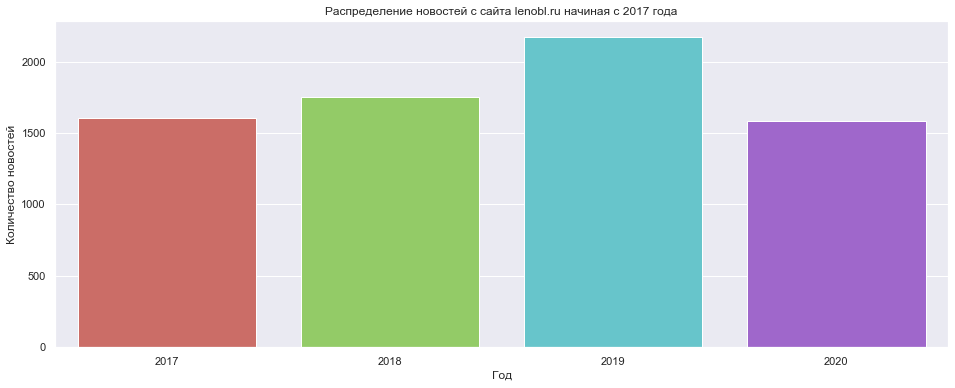

In [189]:
plt.figure(figsize = (16, 6))
ax = sns.barplot(x = count_news['year'], y = count_news['count_news'], palette="hls")

plt.title('Распределение новостей с сайта lenobl.ru начиная с 2017 года')
plt.xlabel('Год')
plt.ylabel('Количество новостей')
plt.show()

In [168]:
# Выведем долю количесват новостей относительно года
for year in news['year'].unique():
    print(f'Процент новостей за {year}: {round(news[news["year"] == year]["year"].count()/news.shape[0] *100,2)} %')

Процент новостей за 2020: 22.25 %
Процент новостей за 2019: 30.53 %
Процент новостей за 2018: 24.65 %
Процент новостей за 2017: 22.57 %


# Распределение по месяцам отностительно года

In [331]:
count_news_month = news.groupby(['year','month_name']).agg({'name_news':'count'}).rename(columns = {'name_news':'count_news'}).reset_index()


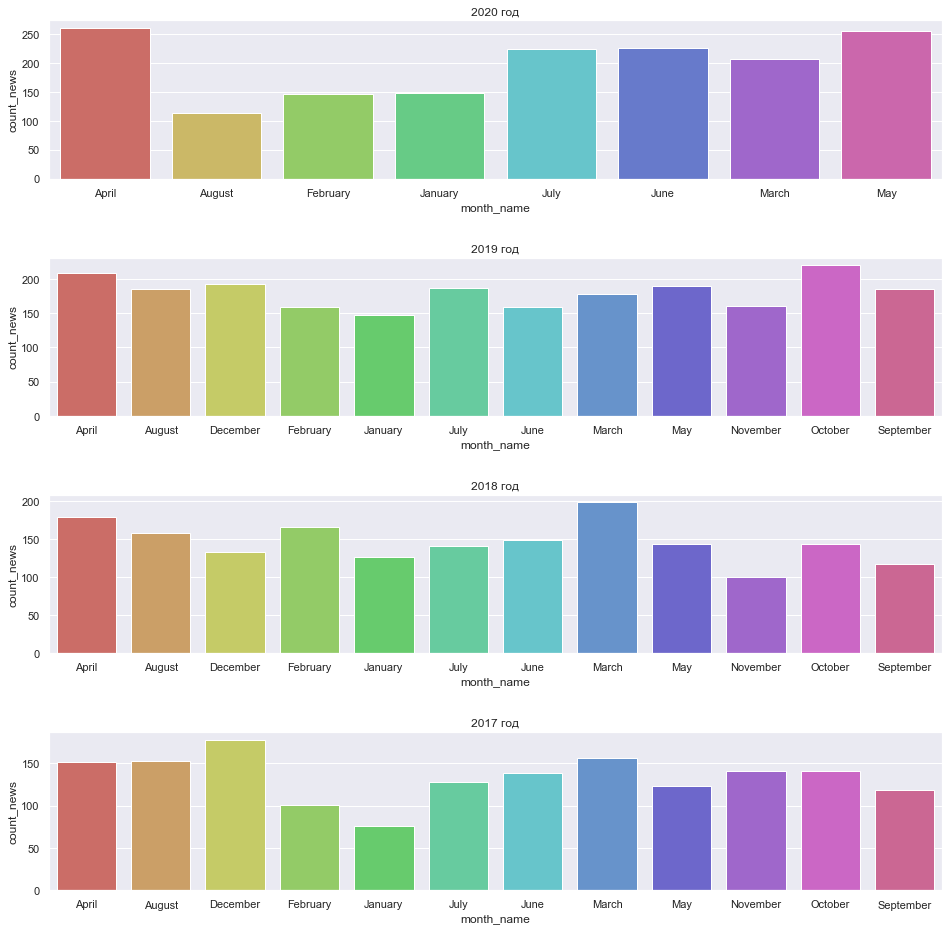

In [334]:
fig,(ax1,ax2,ax3,ax4) = plt.subplots(4, figsize = (16,16))
fig.subplots_adjust(hspace = 0.5, wspace = 0.3)

sns.barplot(x = count_news_month[count_news_month['year']==2020]['month_name'], y = count_news_month['count_news'], palette="hls", ax =ax1 )
ax1.set_title('2020 год')


sns.barplot(x = count_news_month[count_news_month['year']==2019]['month_name'], y = count_news_month['count_news'], palette="hls", ax =ax2 )
ax2.set_title('2019 год')


sns.barplot(x = count_news_month[count_news_month['year']==2018]['month_name'], y = count_news_month['count_news'], palette="hls", ax =ax3 )
ax3.set_title('2018 год')


sns.barplot(x = count_news_month[count_news_month['year']==2017]['month_name'], y = count_news_month['count_news'], palette="hls", ax =ax4 )
ax4.set_title('2017 год')


plt.show()

### Общее растпределение новосте по месяцам начиная с 2017 года

In [324]:
month = news.groupby('month_name').agg({'name_news':'count'}).rename(columns = {'name_news':'count_news'}).sort_values('count_news', ascending = False).reset_index()

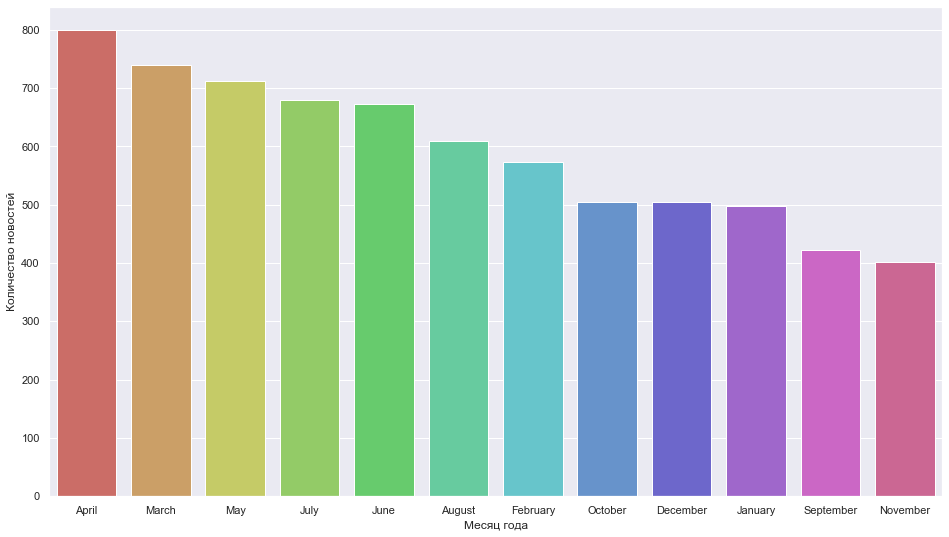

In [327]:
fig,(ax1) = plt.subplots(1, figsize = (16,9))
sns.barplot(x = month['month_name'], y = month['count_news'], palette="hls", ax = ax1)
plt.xlabel('Месяц года')
plt.ylabel('Количество новостей')
plt.show()

Сводная таблица 

год + месяц

In [339]:
pd.pivot_table(data = news, columns = 'month_name', index = 'year',aggfunc='count',values = 'id_news' )

month_name,April,August,December,February,January,July,June,March,May,November,October,September
year,,,,,,,,,,,,
2017,151.0,153.0,178.0,101.0,76.0,128.0,139.0,157.0,123.0,141.0,141.0,119.0
2018,179.0,158.0,133.0,166.0,126.0,141.0,149.0,199.0,143.0,100.0,144.0,117.0
2019,208.0,186.0,193.0,159.0,147.0,187.0,159.0,178.0,190.0,161.0,220.0,186.0
2020,261.0,113.0,NaN,147.0,149.0,224.0,226.0,208.0,256.0,NaN,NaN,NaN


## Дни недели 

По каким дням недели чаще всего публикуют информацию 

In [308]:
week_day = news.groupby(['year','Week_day']).agg({'name_news':'count'}).rename(columns = {'name_news':'count_news'}).reset_index()

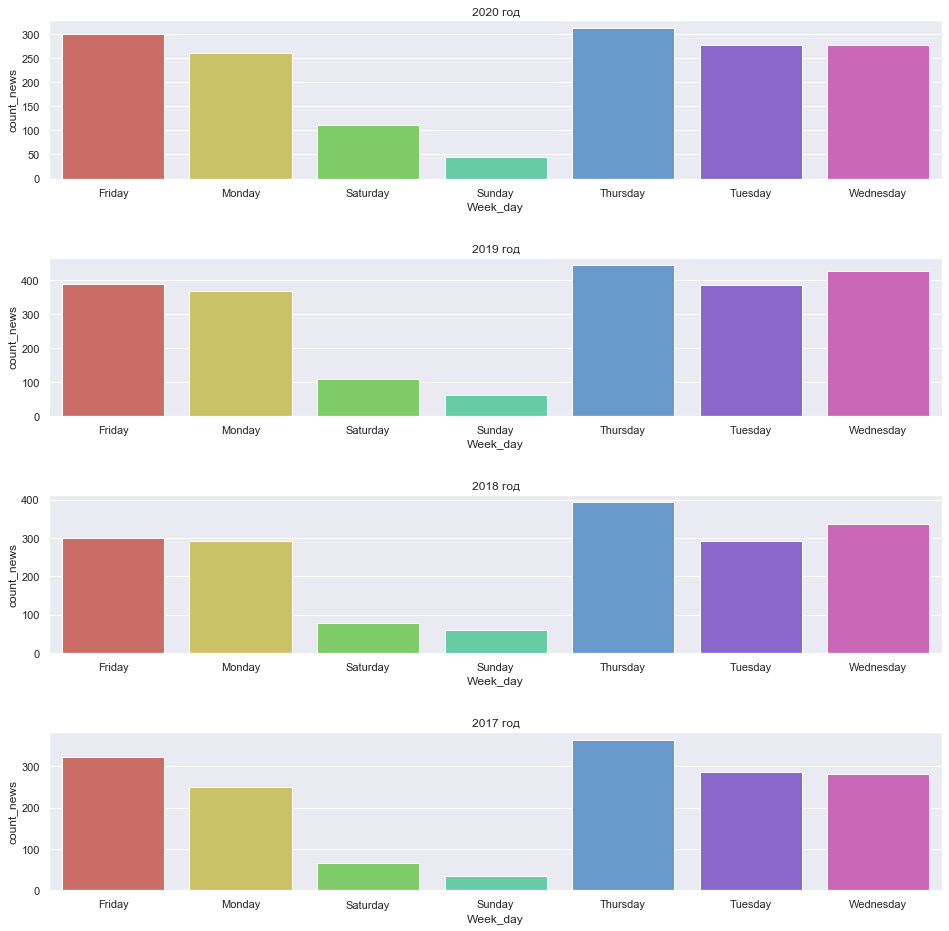

In [312]:
fig,(ax1,ax2,ax3,ax4) = plt.subplots(4, figsize = (16,16))
fig.subplots_adjust(hspace = 0.5, wspace = 0.3)

sns.barplot(x = week_day[week_day['year']==2020]['Week_day'], y = week_day['count_news'], palette="hls", ax =ax1 )
ax1.set_title('2020 год')


sns.barplot(x = week_day[week_day['year']==2019]['Week_day'], y = week_day['count_news'], palette="hls", ax =ax2 )
ax2.set_title('2019 год')

sns.barplot(x = week_day[week_day['year']==2018]['Week_day'], y = week_day['count_news'], palette="hls", ax =ax3 )
ax3.set_title('2018 год')

sns.barplot(x = week_day[week_day['year']==2017]['Week_day'], y = week_day['count_news'], palette="hls", ax =ax4 )
ax4.set_title('2017 год')

plt.show()

По данным видно, что по четвергам выпускают болшее количество новостей. Эта статистика держится из года в год. 

И минимальное количество новосте по выходным 

### Общее распределение по дням недели с 2017 года

In [328]:
week_day_all = news.groupby('Week_day').agg({'name_news':'count'}).rename(columns = {'name_news':'count_news'}).sort_values('count_news', ascending = False).reset_index()

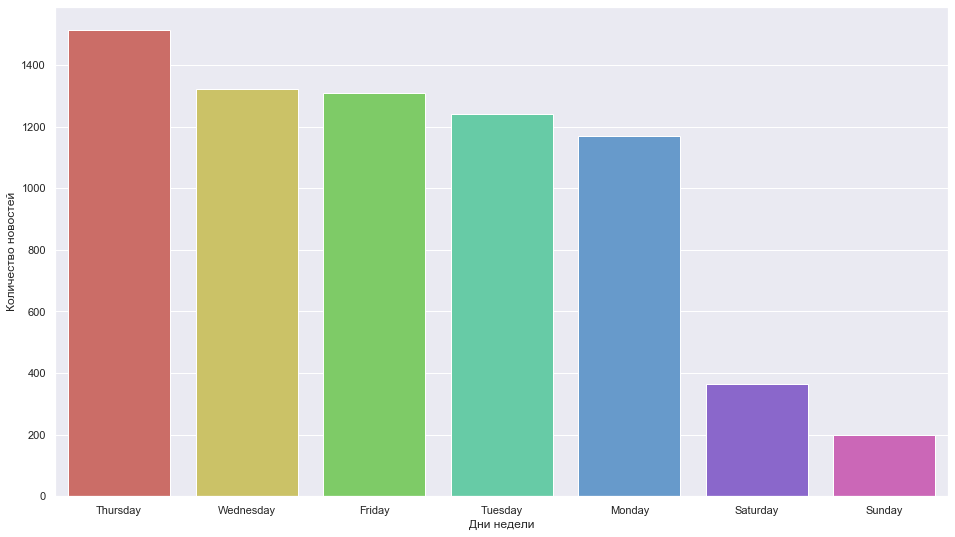

In [341]:
fig,(ax1) = plt.subplots(1, figsize = (16,9))
sns.barplot(x = week_day_all['Week_day'], y = week_day_all['count_news'], palette="hls", ax = ax1)
plt.xlabel('Дни недели')
plt.ylabel('Количество новостей')
plt.show()

Сводная таблица 

Год + день недели

In [335]:
pd.pivot_table(data = news, columns = 'Week_day', index = 'year',aggfunc='count',values = 'id_news' )

Week_day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
year,,,,,,,
2017,323,250,67,34,365,286,282
2018,300,293,80,59,393,293,337
2019,387,367,107,60,443,385,425
2020,300,261,112,45,312,277,277
